<a href="https://colab.research.google.com/github/ArjunMal1311/ML/blob/main/1-Tensorflow/2_Second_Hand_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
df.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [ ]:
# now we are taking years to torque as inputs so these are independent variables and output would
# be price so its depending on the above parameters
# [Ignoring id, road old, road now]

In [4]:
tensor_data = tf.constant(df)
tensor_data = tf.cast(tensor_data, tf.float32)

tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [ ]:
tensor_data[0:2]

<tf.Tensor: shape=(2, 12), dtype=float64, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05]])>

In [5]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[6.130000e+02, 5.725680e+05, 7.735390e+05, 2.000000e+00,
        1.145920e+05, 3.000000e+00, 6.000000e+00, 1.000000e+01,
        2.000000e+02, 6.000000e+01, 9.800000e+01, 2.189080e+05],
       [2.090000e+02, 6.437440e+05, 7.428630e+05, 4.000000e+00,
        6.476400e+04, 4.000000e+00, 1.000000e+01, 9.000000e+00,
        1.510000e+02, 9.900000e+01, 1.350000e+02, 4.844805e+05],
       [4.270000e+02, 6.440520e+05, 7.962320e+05, 2.000000e+00,
        8.169500e+04, 2.000000e+00, 5.000000e+00, 1.300000e+01,
        1.500000e+02, 7.800000e+01, 1.300000e+02, 3.951880e+05],
       [6.980000e+02, 6.031210e+05, 7.905830e+05, 4.000000e+00,
        1.067150e+05, 2.000000e+00, 1.000000e+01, 1.400000e+01,
        1.380000e+02, 5.900000e+01, 7.100000e+01, 3.197280e+05],
       [7.000000e+02, 6.313010e+05, 8.195640e+05, 4.000000e+00,
        9.932000e+04, 3.000000e+00, 8.000000e+00, 1.300000e+01,
        1.610000e+02, 7.600000e+01, 1.130000e+02, 3

In [6]:
X = tensor_data[:, 3:-1] # Ignoring first 3 columns and the price column

In [ ]:
X.shape

TensorShape([1000, 8])

In [ ]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[4.00000e+00, 7.74410e+04, 5.00000e+00, 4.00000e+00, 1.00000e+01,
        1.73000e+02, 6.70000e+01, 7.90000e+01],
       [2.00000e+00, 1.36449e+05, 2.00000e+00, 6.00000e+00, 1.50000e+01,
        1.92000e+02, 1.20000e+02, 1.36000e+02],
       [3.00000e+00, 5.66980e+04, 4.00000e+00, 1.00000e+00, 9.00000e+00,
        1.98000e+02, 9.80000e+01, 1.18000e+02],
       [2.00000e+00, 1.32215e+05, 1.00000e+00, 5.00000e+00, 1.50000e+01,
        1.41000e+02, 6.00000e+01, 9.00000e+01],
       [3.00000e+00, 7.89450e+04, 1.00000e+00, 2.00000e+00, 1.40000e+01,
        1.77000e+02, 7.30000e+01, 1.23000e+02]], dtype=float32)>

In [7]:
y = tensor_data[:, -1]
y.shape

TensorShape([1000])

In [8]:
# Adding extra dimension
y = tf.expand_dims(y, axis = -1)
y[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[218908. ],
       [484480.5],
       [395188. ],
       [319728. ],
       [344405.5]], dtype=float32)>

In [32]:
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError

In [10]:
# normalizer = Normalization(mean = 5, variance = 4)
# x_normalized = tf.constant([[3, 4, 5, 6, 7]])    # ((x-mu)/sigma)
# normalizer(x_normalized)

normalizer = Normalization()
x_normalized = tf.constant([[3, 5, 5, 6, 7],
                            [4, 5, 6, 9, 8]]) # means and SD are gone column wise, mean -> (3+4)/2 --> 3.5 and SD would be 3.5-3 --> 0.5, so overall we get (x-mu)/SD so (4-3.5)/0.5 which is 1

normalizer.adapt(x_normalized)
normalizer(x_normalized)

# Why are we normalizing
# In order to train the data faster


<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1.,  0., -1., -1., -1.],
       [ 1.,  0.,  1.,  1.,  1.]], dtype=float32)>

In [11]:
# We will normalize the 8 columns of X

normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-1.4904962 ,  0.49140757,  0.00855871,  0.14452504, -0.7288842 ,
         1.7172815 , -1.1969745 , -0.2576471 ],
       [-0.32650068, -1.218786  ,  0.7217798 ,  1.5614388 , -1.1774286 ,
        -0.82437944,  0.70484465,  1.5002241 ],
       [-1.4904962 , -0.63768125, -0.7046624 , -0.20970342,  0.6167489 ,
        -0.87625   , -0.3192118 ,  1.262674  ],
       [-0.32650068,  0.22105367, -0.7046624 ,  1.5614388 ,  1.0652933 ,
        -1.4986976 , -1.2457391 , -1.540418  ],
       [-0.32650068, -0.03275707,  0.00855871,  0.8529819 ,  0.6167489 ,
        -0.30567312, -0.41674098,  0.4550034 ]], dtype=float32)>

In [ ]:
# LINEAR REGRESSION

# the equation y = mx + c takes on a specific meaning and is used to represent the linear relationship between the independent
# variable x and the dependent variable y within the framework of linear regression

# We need to make the y = mx + c represent mostly of our inputs thus we are expecting a better function
# It should represent best of our data



# Below code is the sequential API
# when layers form a sequence, they are constrcuted in a way one layer is stacked up
# 1 - 2 - 3 ..... - N
# In the form of sequence

# We have a dense layer at the end and we need to ensure that the data that we pass to dense layer is normalized
# like we have input horse power we input the horse power (x), multiply it by m and then add c
# m is weight and c is bias

# output is y (predicted)

# Similarly in this modal we have 8 layers, we pass them to dense layer
# for each input we have m1, m2 .... m8 weights -> m1x1 + m2x2 + ...... +m8x8 + c, this thing goes to dense layer
# so total parameters are 9 so in the below code output you can see trainable params as 9

# Non trainable params come from normalization layer (17)

# Overview

# Data -> Normalized -> Dense Layer -> Output

# Dense(1), 1 output we want, if we want to predict 2 prices then Dense(2)

In [20]:
model = tf.keras.Sequential([InputLayer(input_shape = (8)) ,normalizer, Dense(1)]) # We are generally not passing 1000 inputs, we just pass around 32 inputs, not done in this!

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  multiple                  17        
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


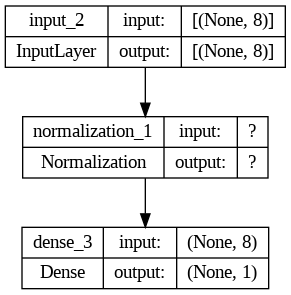

In [21]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True)

In [22]:
# We now have build model y = mx + c
# now we have line now when we put x we will get y
# we need to compare the output which model gives and actual output
# we need to minimize the error

# so every time error occurs, we sanction the error

# (actual output - y predicted)^2, if same then we get 0 then zero sanction
# (2-4)^2 -> 4 (we amplify the error)

# Overall error Calculation
# we use Mean square error function

# Refer Image 2-Modal

In [25]:
# Usage Reference
y_true = [[0.0, 1.0], [0.0, 0.0]]
y_pred = [[1.0, 1.0], [1.0, 0.0]]

mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()    # (0-1)^2 -> 1, (1-1)^2 -> 0, (0-1)^2 -> 1, (0-0)^2 -> 0, so overall we get (1+0+1+0)/4, 4 is total elements, and we get 0.5

0.5

In [ ]:
# For regression, we can also use MeanAbsoluteError
# loss = abc(y_true - y_pred)

# we need to understand when to use either method

# in mean absolute error the error mainly comes when we have outlier
# the problem is we will get very large error and thus this error can be prevented by using meanabsoluteerror
# which uses the absolute value rather than square



# Loss function Yuba Loss allows us to use both methods in intelligent manner
# loss = 0.5*x^2                    if |y_true - y_pred| <=d
# loss = 0.5*d^2 + d*(|x| - d)      if |y_true - y_pred| > d

# d is threashold which decides whether the data point is outlier or not

In [34]:
# model.compile(loss = Huber(delta = 1))

model.compile(loss = MeanSquaredError())

In [35]:
# We want to now obtain the value of m and c
# Commonly used today is stochastic gradient descent [SGD]

# W = Wp - (LR)(dL/dWp)    # Wp - Initialized Weight, LR is Learning Rate, (dL/dWp) -> Rate the loss changes wrt to that weight

# y = mx + c
# we ll assign weights (m) randomly so m = 0 anc c = 2 (say)

# new m = 0 - 0.1*(dL/dm)
# new c = 2 - 0.1*(dL/dc)

# |Ya - (mx+c)| --> New Error


In [36]:
model.fit(X, y, epochs = 100, verbose = 1) # epochs is the number of times we gonna update the weights, verbose deals with output of our training set

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 111063506944.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 111063474176.0000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 111063449600.0000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 111063416832.0000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 111063375872.0000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 111063367680.0000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 111063343104.0000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 111063318528.0000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 111063285760.0000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 111063252992.0000
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 111063228416.00